# Carbon Aware SDK Demo Notebook

This notebook is supposed to give you an introduction to using the Carbon Aware SDK, by interacting with it deployed as a Web API. For a guide on setting it up as a Web API, see the GettingStarted.md guide in the main repo of the project: https://github.com/Green-Software-Foundation/carbon-aware-sdk/blob/dev/GettingStarted.md

# By Making Applications Carbon Aware, we can decrease carbon footprint of software by up to 76%!
Based on example of time shifting and location shifting from westcentralus to francecentral - times used for calculation:
- westcentralus: 2022-08-15 20:55
- francecentral: 2022-08-15 13:45

# Time Shifting:

## Scenario:
A software engineer is running a computationally intensive data processing job at 8:55 pm every day. The job is run in `westcentralus` Azure Data centre. They suspects that running the task at a different time of day, might produce less carbon emissions, since there is more solar energy in the grid during the day.
1. They wants to check, what is the current carbon intensity in that location.
2. They also would like to know, if it is better for the planet 🌍, to run this task at a different time of day.

They decides to use the Carbon Aware SDK to satisfy their curiosity, and possibly build a business case to move the job to another time, if their findings confirm his suspicions. They have cloned the [repository](https://github.com/Green-Software-Foundation/carbon-aware-sdk), and hosted it locally as a Web API on https://localhost:5073


1. They starts by running a query on the `/emissions/bylocation` endpoint of the Carbon Aware SDK, for the region `westcentralus` and time 8:55pm:

In [1]:
## Engineer's preperations:
# Getting data with the Carbon Aware SDK
import os
import datetime
import openapi_client
from pprint import pprint
from openapi_client.api import carbon_aware_api
from openapi_client.model.emissions_data import EmissionsData
from  dateutil.parser import parse
from dotenv import load_dotenv

# Load env variables:
load_dotenv()
try:
    host_url = os.environ["SDK_WEB_HOST"]
except KeyError:
    print("SDK_WEB_HOST environment var not set, using localhost")
    host_url = "http://localhost:5073"
    
# Defining the host is optional and defaults to http://localhost
# See configuration.py for a list of all supported configuration parameters.
configuration = openapi_client.Configuration(
        host = host_url
)


SDK_WEB_HOST environment var not set, using localhost


Running the actual query, with parameters:
- location: `westcentralus`
- start_time: 2022-08-15 21:00
- end_time: 2022-08-15 20:55
- duration_minutes: 0

In [2]:
# Enter a context with an instance of the API client
api_client =  openapi_client.ApiClient(configuration)
# Create an instance of the API class
api_instance = carbon_aware_api.CarbonAwareApi(api_client)

location = "westcentralus"               # str |  (required)
start_time = parse('2022-08-15T21:00')   # datetime |  (optional)
to_time = parse('2022-08-15T20:55')      # datetime |  (optional)
duration_minutes = 0                     # int |  (optional) (default to 0)

try:
    api_response = api_instance.get_emissions_data_for_location_by_time(location=location, time=start_time, to_time=to_time, duration_minutes=duration_minutes)

    pprint(api_response)
except openapi_client.ApiException as e:
    print("Exception when calling CarbonAwareApi->emissions_bylocation_get: %s\n" % e)

[{'duration': '00:05:00',
 'location': 'PACE',
 'rating': 928.50358139,
 'time': datetime.datetime(2022, 8, 15, 20, 55, tzinfo=tzutc())}]


From the query above, the software engineer can see that the carbon intensity in `westcentralus` at 8:55pm is `928.5` grams CO2 per kWh. That's a lot!

He wonders whether running it at a different time of day might improve that value, so he makes a query to find the best time of day for running his job, by polling the `/emissions/bylocations/best` endpoint. (It will return a single location and time with the lowest carbon intensity in a given time window). He runs it, telling the SDK to look for best time between 12am on 15.08.2022 and 11:59pm on 15.08.2022.

parameters:
- locations: [`westcentralus`]
- start_time: 2022-08-15 00:00
- end_time: 2022-08-15 23:59
- duration_minutes: 0

In [3]:
locations = ["westcentralus"]        # List[str] |  (required)
start_time = parse('2022-08-15T00:00')   # datetime |  (optional)
to_time = parse('2022-08-15T20:55')      # datetime |  (optional)
duration_minutes = 0                     # int |  (optional) (default to 0)

try:
    api_response = api_instance.get_best_emissions_data_for_locations_by_time(location=locations, time=start_time, to_time=to_time, duration_minutes=duration_minutes)

    print("Best time for running the job")
    pprint(api_response)
except openapi_client.ApiException as e:
    print("Exception when calling CarbonAwareApi->emissions_bylocation_get: %s\n" % e)

Best time for running the job
[{'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.96209093,
 'time': datetime.datetime(2022, 8, 14, 23, 55, tzinfo=tzutc())}]


## Outcome of time shifting: Carbon footprint decreased by up to 47%!
Engineer's short experiment showed him that moving the job to a different time (In this case, 11:55 pm UTC), he can decrease the carbon emissions from `928.5` gram CO2 per kWh to `494.0`!

### Time shifting: over 55 days
Below, we are requesting the carbon intensity data for `westcentralus` region for up to 55 days before 15th of August.

In [4]:
location = "westcentralus"               # str |  (required)
start_time = parse('2022-07-17T00:05')   # datetime |  (optional)
to_time = parse('2022-08-15T23:59')      # datetime |  (optional)
duration_minutes = 0                     # int |  (optional) (default to 0)

try:
    # Get last 30 days
    api_response = api_instance.get_emissions_data_for_location_by_time(location=location, time=start_time, to_time=to_time, duration_minutes=duration_minutes)
    data_westcentralus = api_response[:]
    # Get 25 days before that
    start_time = parse('2022-06-22T00:05')   # datetime |  (optional)
    to_time = parse('2022-07-16T23:59')      # datetime |  (optional)       
    api_response = api_instance.get_emissions_data_for_location_by_time(location=location, time=start_time, to_time=to_time, duration_minutes=duration_minutes)
    data_westcentralus += api_response[:]
    pprint(api_response[:5])
    print("Number of days: ", len(data_westcentralus)/288) # 288 5 minute chunks in each 24h
except openapi_client.ApiException as e:
    print("Exception when calling CarbonAwareApi->emissions_bylocation_get: %s\n" % e)

[{'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.50849856,
 'time': datetime.datetime(2022, 7, 16, 23, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 418.21216514,
 'time': datetime.datetime(2022, 7, 16, 23, 50, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 615.52484609,
 'time': datetime.datetime(2022, 7, 16, 23, 45, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 583.31978782,
 'time': datetime.datetime(2022, 7, 16, 23, 40, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 603.73144447,
 'time': datetime.datetime(2022, 7, 16, 23, 35, tzinfo=tzutc())}]
Number of days:  55.0


#### Next, we are filtering the data to get the times that interest us, extracting the carbon intensity value for each day at the original time and time-shifted time

In [5]:
data_8_55_westcentralus = list(filter(lambda x: x['time'].strftime('%H:%M:%S') == parse("2022-08-15T20:55").strftime('%H:%M:%S'), data_westcentralus))
print("8:55 in west_centralus length: ", len(data_8_55_westcentralus))
pprint(data_8_55_westcentralus[:3])
data_11_55_westcentralus = list(filter(lambda x: x['time'].strftime('%H:%M:%S') == parse("2022-08-15T23:55").strftime('%H:%M:%S'), data_westcentralus))
print("11:55 in west_centralus length: ", len(data_11_55_westcentralus))
pprint(data_11_55_westcentralus[:3])

data_top_row_westcentralus = ["date", "20:55 rating", "23:55 rating"]
data_combined_westcentralus = [(x['time'].strftime('%Y-%m-%d'),
                                data_8_55_westcentralus[i]['rating'],
                                data_11_55_westcentralus[i]['rating'])
                               for i, x in enumerate(data_8_55_westcentralus)]
data_combined_westcentralus = sorted(data_combined_westcentralus, key=lambda x: x[0])


8:55 in west_centralus length:  55
[{'duration': '00:05:00',
 'location': 'PACE',
 'rating': 928.50358139,
 'time': datetime.datetime(2022, 8, 15, 20, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 928.50358139,
 'time': datetime.datetime(2022, 8, 14, 20, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 824.63092866,
 'time': datetime.datetime(2022, 8, 13, 20, 55, tzinfo=tzutc())}]
11:55 in west_centralus length:  55
[{'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.96209093,
 'time': datetime.datetime(2022, 8, 15, 23, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.96209093,
 'time': datetime.datetime(2022, 8, 14, 23, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.96209093,
 'time': datetime.datetime(2022, 8, 13, 23, 55, tzinfo=tzutc())}]


### Plotting the data
Now we plot the data, putting it into a pandas DataFrame first:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = pd.DataFrame(data=data_combined_westcentralus, columns = data_top_row_westcentralus)
print(df2)

          date  20:55 rating  23:55 rating
0   2022-06-22    690.367587    342.915832
1   2022-06-23    569.712017    489.879760
2   2022-06-24    809.662380    489.879760
3   2022-06-25    808.301603    489.879760
4   2022-06-26    809.662380    489.879760
5   2022-06-27    418.212165    496.683645
6   2022-06-28    446.334892    457.674701
7   2022-06-29    713.954390    496.683645
8   2022-06-30    701.707396    496.683645
9   2022-07-01    669.048746    496.683645
10  2022-07-02    668.141561    695.357103
11  2022-07-03    728.015754    496.683645
12  2022-07-04    655.440975    493.508499
13  2022-07-05    735.273232    493.508499
14  2022-07-06    855.021617    493.508499
15  2022-07-07    828.713260    493.508499
16  2022-07-08    830.981222    493.508499
17  2022-07-09    743.437894    493.508499
18  2022-07-10    809.662380    493.508499
19  2022-07-11    816.919858    493.508499
20  2022-07-12    738.901971    493.508499
21  2022-07-13    809.662380    493.508499
22  2022-07

The cell below displays a plot of the data of Carbon Intensity in the `westcentralus` region at 2 distinct times.

Plot code adjusted based on: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#35.-Time-Series-Plot

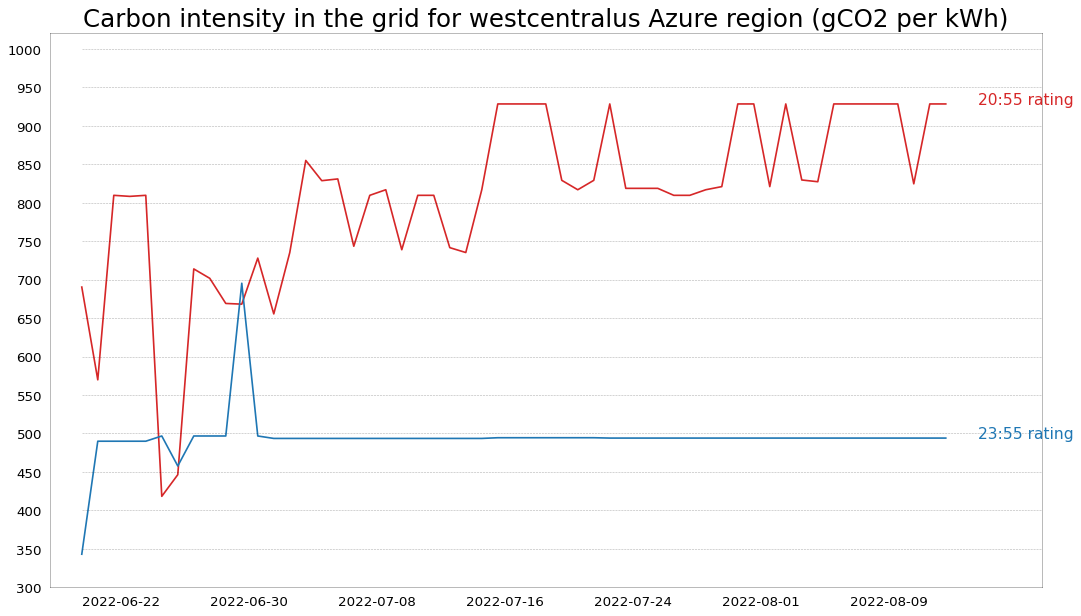

In [7]:
# Import Data
df = df2

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 300
y_UL = int(df.iloc[:, 1:].max().max()*1.1)
y_interval = 50
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = df.columns[1:]  
for i, column in enumerate(columns):    
    plt.plot(df.date.values, df[column].values, lw=1.5, color=mycolors[i])    
    plt.text(df.shape[0]+1, df[column].values[-1], column, fontsize=14, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=60, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Carbon intensity in the grid for westcentralus Azure region (gCO2 per kWh)', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, df.shape[0], 8), df.date.values[::8], horizontalalignment='left', fontsize=12)    
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 60)    
plt.show()



In [8]:
original_time_mean = df["20:55 rating"].mean()
new_time_mean = df["23:55 rating"].mean()
perc_decrease = (original_time_mean-new_time_mean)/original_time_mean*100
print ("Carbon intensity percentage decrease as a result of time shifting: {perc_decrease:.2f}%".format(perc_decrease = perc_decrease))


Carbon intensity percentage decrease as a result of time shifting: 38.76%


## Actual carbon emissions would have decreased by 38.76% in the last 55 days as a result of this time shift!

# Location Shifting:

Now that we found the best time for the Software Engineer to run his computationally intensive data processing job, the software engineer is considering if he can further decrease the carbon footprint by moving the job to a different location. Let's suppose the Software Engineer is required to keep the job running in the US, but can move it to a different region inside of US. He can once again check this using the SDK, and the `/emissions/bylocations/best` endpoint!

In [9]:
us_azure_regions = ['eastus', 'eastus2', 'southcentralus', 'westus2', 'westus3', 'centralus', 'northcentralus', 'westus', 'westcentralus']
start_time = parse('2022-08-15T23:59')   # datetime |  (optional)
to_time = parse('2022-08-15T23:55')      # datetime |  (optional)
duration_minutes = 0                     # int |  (optional) (default to 0)

try:
    api_response = api_instance.get_best_emissions_data_for_locations_by_time(location=us_azure_regions, time=start_time, to_time=to_time, duration_minutes=duration_minutes)
    print("Best Location for running the job at 11:55pm in US: ")
    pprint(api_response)

except openapi_client.ApiException as e:
    print("Exception when calling CarbonAwareApi->emissions_bylocation_get: %s\n" % e)


Best Location for running the job at 11:55pm in US: 
[{'duration': '00:05:00',
 'location': 'AZPS',
 'rating': 344.27660883000004,
 'time': datetime.datetime(2022, 8, 15, 23, 55, tzinfo=tzutc())}]


In [10]:
# Get carbon intensity percentage decrease based on a single day of data:
carbon_intensity_new = api_response[0]['rating']
carbon_intensity_old = 493.96209
perc_decrease = (carbon_intensity_old-carbon_intensity_new)/carbon_intensity_old*100
print ("Carbon intensity percentage decrease as a result of location shifting to westus3 (on that day): {perc_decrease:.2f}%".format(perc_decrease = perc_decrease))


Carbon intensity percentage decrease as a result of location shifting to westus3 (on that day): 30.30%


The best alternative data centre in the US at that time is `westus3` which corresponds to the wattTime region `AZPS`. Moving here can give the software engineer a further decrease in emissions by up to 30.30%!

## Location shifting: over 55 days

To verify correctness of location shifting, we will be looking at 55 days before the original day checked. We will be using the `/emissions/bylocations` endpoint to get data from multiple locations.

In [11]:
locations = ["westcentralus", "westus3"]               # List[str] |  (required)
start_time = parse('2022-07-17T00:05')                # datetime |  (optional)
to_time = parse('2022-08-15T23:59')                   # datetime |  (optional)
duration_minutes = 0                                  # int |  (optional) (default to 0)

try:
    # Get last 30 days
    api_response = api_instance.get_emissions_data_for_locations_by_time(location=locations, time=start_time, to_time=to_time, duration_minutes=duration_minutes)
    data_both_regions = api_response[:]
    # Get 25 days before that
    start_time = parse('2022-06-22T00:05')   # datetime |  (optional)
    to_time = parse('2022-07-16T23:59')      # datetime |  (optional)       
    api_response = api_instance.get_emissions_data_for_locations_by_time(location=locations, time=start_time, to_time=to_time, duration_minutes=duration_minutes)
    data_both_regions += api_response[:]
    pprint(api_response[:5])
    print("Number of days: ", len(data_both_regions)/288/len(locations)) # 288 5 minute chunks in each 24h, plus 2 readings for each point (for 2 locations)
except openapi_client.ApiException as e:
    print("Exception when calling CarbonAwareApi->emissions_bylocation_get: %s\n" % e)

[{'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.50849856,
 'time': datetime.datetime(2022, 7, 16, 23, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 418.21216514,
 'time': datetime.datetime(2022, 7, 16, 23, 50, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 615.52484609,
 'time': datetime.datetime(2022, 7, 16, 23, 45, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 583.31978782,
 'time': datetime.datetime(2022, 7, 16, 23, 40, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 603.73144447,
 'time': datetime.datetime(2022, 7, 16, 23, 35, tzinfo=tzutc())}]
Number of days:  55.0


Filtering the data that interests us, only looking at the particular time of day for all data points, and splitting into two arrays based on location:

In [12]:
data_11_55_westcentralus = list(filter(lambda x: x['time'].strftime('%H:%M:%S') == parse("2022-08-15T23:55").strftime('%H:%M:%S') and x['location'] == 'PACE', data_both_regions))
print("11:55 in west_centralus length: ", len(data_11_55_westcentralus))
pprint(data_11_55_westcentralus[:3])
data_11_55_westus3 = list(filter(lambda x: x['time'].strftime('%H:%M:%S') == parse("2022-08-15T23:55").strftime('%H:%M:%S') and x['location'] == 'AZPS', data_both_regions))
print("11:55 in westus3 length: ", len(data_11_55_westus3))
pprint(data_11_55_westus3[:3])


data_top_row_combined = ["date", "23:55 westcentralus rating", "23:55 westus3 rating"]
data_combined = [(x['time'].strftime('%Y-%m-%d'),
                  data_11_55_westcentralus[i]['rating'],
                  data_11_55_westus3[i]['rating'])
                 for i, x in enumerate(data_11_55_westcentralus)]
data_combined = sorted(data_combined, key=lambda x: x[0])


11:55 in west_centralus length:  55
[{'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.96209093,
 'time': datetime.datetime(2022, 8, 15, 23, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.96209093,
 'time': datetime.datetime(2022, 8, 14, 23, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.96209093,
 'time': datetime.datetime(2022, 8, 13, 23, 55, tzinfo=tzutc())}]
11:55 in westus3 length:  55
[{'duration': '00:05:00',
 'location': 'AZPS',
 'rating': 344.27660883000004,
 'time': datetime.datetime(2022, 8, 15, 23, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'AZPS',
 'rating': 344.27660883000004,
 'time': datetime.datetime(2022, 8, 14, 23, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'AZPS',
 'rating': 344.27660883000004,
 'time': datetime.datetime(2022, 8, 13, 23, 55, tzinfo=tzutc())}]


### Plotting the data
Now we plot the data, putting it into a pandas DataFrame first:

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df3 = pd.DataFrame(data=data_combined, columns = data_top_row_combined)
print(df3)

          date  23:55 westcentralus rating  23:55 westus3 rating
0   2022-06-22                  342.915832            344.276609
1   2022-06-23                  489.879760            344.276609
2   2022-06-24                  489.879760            344.276609
3   2022-06-25                  489.879760            344.276609
4   2022-06-26                  489.879760            344.276609
5   2022-06-27                  496.683645            397.346916
6   2022-06-28                  457.674701            344.276609
7   2022-06-29                  496.683645            344.276609
8   2022-06-30                  496.683645            344.276609
9   2022-07-01                  496.683645            428.644790
10  2022-07-02                  695.357103            407.779541
11  2022-07-03                  496.683645            406.872356
12  2022-07-04                  493.508499            407.779541
13  2022-07-05                  493.508499            429.098382
14  2022-07-06           

The cell below displays a plot of the data of Carbon Intensity in the `westcentralus` region and `westus3` region at 11:55 pm for a time period of 55 days.

Plot code adjusted based on: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#35.-Time-Series-Plot

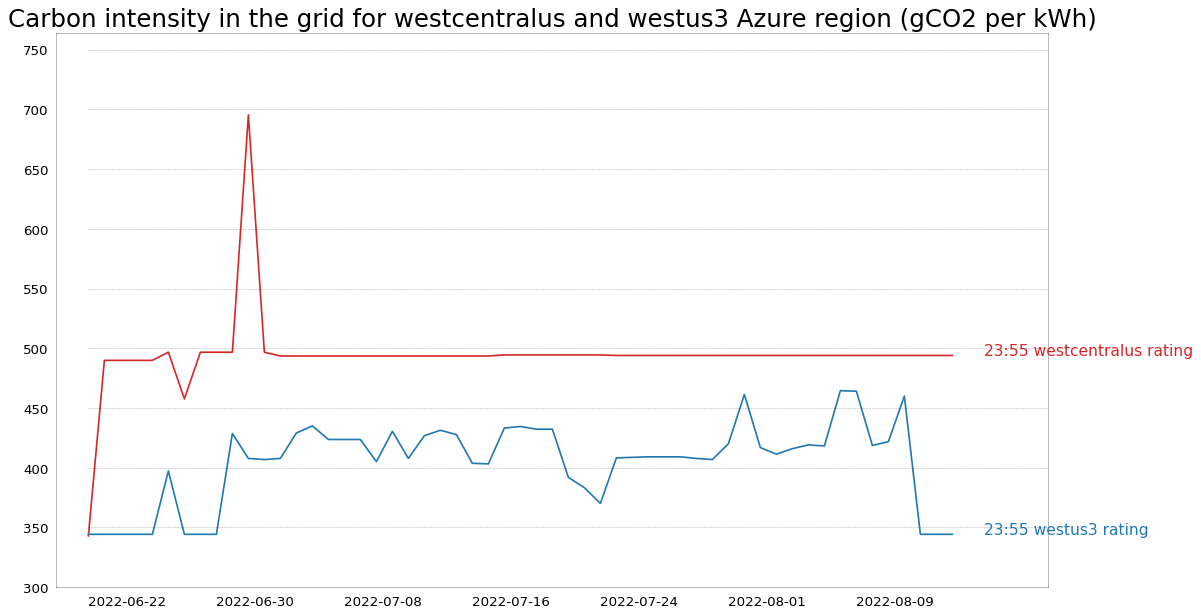

In [14]:
# Import Data
df = df3

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 300
y_UL = int(df.iloc[:, 1:].max().max()*1.1)
y_interval = 50
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = df.columns[1:]  
for i, column in enumerate(columns):    
    plt.plot(df.date.values, df[column].values, lw=1.5, color=mycolors[i])    
    plt.text(df.shape[0]+1, df[column].values[-1], column, fontsize=14, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=60, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Carbon intensity in the grid for westcentralus and westus3 Azure region (gCO2 per kWh)', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, df.shape[0], 8), df.date.values[::8], horizontalalignment='left', fontsize=12)    
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 60)    
plt.show()



Getting the average percentage decrease in carbon intensity:

In [15]:
original_location_mean = df["23:55 westcentralus rating"].mean()
new_location_mean = df["23:55 westus3 rating"].mean()
perc_decrease = (original_location_mean-new_location_mean)/original_location_mean*100
print ("Carbon intensity percentage decrease as a result of location shifting: {perc_decrease:.2f}%".format(perc_decrease = perc_decrease))


Carbon intensity percentage decrease as a result of location shifting: 18.18%


## Actual carbon emissions would have decreased by 18.18% in the last 55 days as a result of this location shift!

# Location Shifting: Globally

Seeing such huge improvements in carbon efficiency, the Software Engineer wonders whether moving it to a different region on the globe might have an even bigger impact on the carbon emissions. Although he is limited to the regions in the US by company policy, maybe he can build a business case for moving the job outside of US - supporting this with data collected with the Carbon Aware SDK!

### Getting best region Globally
We can poll the `/emissions/bylocations/best` endpoint to find out which region has the lowest carbon intensity at the time decided from the time shift before. We will be looking at some select regions around the globe (These are the regions that have WattTime coverage at the time this demo was created).

In [16]:
watttime_supported_regions = ['eastus', 'eastus2', 'southcentralus', 'westus2', 'westus3', 'australiaeast', 'northeurope', 'swedencentral', 'uksouth', 'westeurope', 'centralus', 'canadacentral', 'francecentral', 'germanywestcentral', 'norwayeast', 'northcentralus', 'westus', 'westcentralus', 'australiacentral', 'australiacentral2', 'australiasoutheast', 'canadaeast']
start_time = parse('2022-08-15T23:59')   # datetime |  (optional)
to_time = parse('2022-08-15T23:55')      # datetime |  (optional)
duration_minutes = 0                     # int |  (optional) (default to 0)

try:
    api_response = api_instance.get_best_emissions_data_for_locations_by_time(location=watttime_supported_regions, time=start_time, to_time=to_time, duration_minutes=duration_minutes)
    print("Best Location for running the job at 11:55pm Globally: ")
    pprint(api_response)

except openapi_client.ApiException as e:
    print("Exception when calling CarbonAwareApi->emissions_bylocation_get: %s\n" % e)

Best Location for running the job at 11:55pm Globally: 
[{'duration': '00:05:00',
 'location': 'FR',
 'rating': 257.18687379,
 'time': datetime.datetime(2022, 8, 15, 23, 55, tzinfo=tzutc())}]


In [17]:
# Get carbon intensity percentage decrease based on a single day of data:
carbon_intensity_new = api_response[0]['rating']
carbon_intensity_old = 344.276608
perc_decrease = (carbon_intensity_old-carbon_intensity_new)/carbon_intensity_old*100
print ("Carbon intensity percentage decrease as a result of location shifting to francecentral (on that day): {perc_decrease:.2f}%".format(perc_decrease = perc_decrease))


Carbon intensity percentage decrease as a result of location shifting to francecentral (on that day): 25.30%


The best alternative data centre Globally at that time is francecentral which corresponds to the wattTime region FR. Moving here can give the software engineer a further decrease in emissions by up to 25.3%!


## Location shifting Global: over 55 days

To verify correctness of location shifting, we will be looking at 55 days before the original day checked. We will be using the `/emissions/bylocations` endpoint to get data from multiple locations.

In [18]:
locations = ["westcentralus", "westus3", "francecentral"]               # List[str] |  (required)
start_time = parse('2022-07-17T00:05')                # datetime |  (optional)
to_time = parse('2022-08-15T23:59')                   # datetime |  (optional)
duration_minutes = 0                                  # int |  (optional) (default to 0)

try:
    # Get last 30 days
    api_response = api_instance.get_emissions_data_for_locations_by_time(location=locations, time=start_time, to_time=to_time, duration_minutes=duration_minutes)
    data_all_regions = api_response[:]
    # Get 25 days before that
    start_time = parse('2022-06-22T00:05')   # datetime |  (optional)
    to_time = parse('2022-07-16T23:59')      # datetime |  (optional)       
    api_response = api_instance.get_emissions_data_for_locations_by_time(location=locations, time=start_time, to_time=to_time, duration_minutes=duration_minutes)
    data_all_regions += api_response[:]
    pprint(api_response[:5])
    print("Number of days: ", len(data_all_regions)/288/len(locations)) # 288 5 minute chunks in each 24h, plus 2 readings for each point (for 2 locations)
except openapi_client.ApiException as e:
    print("Exception when calling CarbonAwareApi->emissions_bylocation_get: %s\n" % e)

[{'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.50849856,
 'time': datetime.datetime(2022, 7, 16, 23, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 418.21216514,
 'time': datetime.datetime(2022, 7, 16, 23, 50, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 615.52484609,
 'time': datetime.datetime(2022, 7, 16, 23, 45, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 583.31978782,
 'time': datetime.datetime(2022, 7, 16, 23, 40, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 603.73144447,
 'time': datetime.datetime(2022, 7, 16, 23, 35, tzinfo=tzutc())}]
Number of days:  55.0


Filtering the data that interests us, only looking at the particular time of day for all data points, and splitting into two arrays based on location:

In [19]:
data_11_55_westcentralus = list(filter(lambda x: x['time'].strftime('%H:%M:%S') == parse("2022-08-15T23:55").strftime('%H:%M:%S') and x['location'] == 'PACE', data_all_regions))
print("11:55 in west_centralus length: ", len(data_11_55_westcentralus))
pprint(data_11_55_westcentralus[:3])
data_11_55_westus3 = list(filter(lambda x: x['time'].strftime('%H:%M:%S') == parse("2022-08-15T23:55").strftime('%H:%M:%S') and x['location'] == 'AZPS', data_all_regions))
print("11:55 in westus3 length: ", len(data_11_55_westus3))
pprint(data_11_55_westus3[:3])

data_11_55_francecentral = list(filter(lambda x: x['time'].strftime('%H:%M:%S') == parse("2022-08-15T23:55").strftime('%H:%M:%S') and x['location'] == 'FR', data_all_regions))
print("11:55 in francecentral length: ", len(data_11_55_francecentral))
pprint(data_11_55_francecentral[:3])


data_top_row_combined = ["date", "23:55 westcentralus rating", "23:55 westus3 rating", "23:55 francecentral rating"]
data_combined = [(x['time'].strftime('%Y-%m-%d'),
                  data_11_55_westcentralus[i]['rating'],
                  data_11_55_westus3[i]['rating'],
                 data_11_55_francecentral[i]['rating'])
                 for i, x in enumerate(data_11_55_westcentralus)]
data_combined = sorted(data_combined, key=lambda x: x[0])


11:55 in west_centralus length:  55
[{'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.96209093,
 'time': datetime.datetime(2022, 8, 15, 23, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.96209093,
 'time': datetime.datetime(2022, 8, 14, 23, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.96209093,
 'time': datetime.datetime(2022, 8, 13, 23, 55, tzinfo=tzutc())}]
11:55 in westus3 length:  55
[{'duration': '00:05:00',
 'location': 'AZPS',
 'rating': 344.27660883000004,
 'time': datetime.datetime(2022, 8, 15, 23, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'AZPS',
 'rating': 344.27660883000004,
 'time': datetime.datetime(2022, 8, 14, 23, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'AZPS',
 'rating': 344.27660883000004,
 'time': datetime.datetime(2022, 8, 13, 23, 55, tzinfo=tzutc())}]
11:55 in francecentral length:  55
[{'duration': '00:05:00',
 'location': 'FR',
 'rating'

### Plotting the data
Now we plot the data, putting it into a pandas DataFrame first:

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df4 = pd.DataFrame(data=data_combined, columns = data_top_row_combined)
print(df4)

          date  23:55 westcentralus rating  23:55 westus3 rating  \
0   2022-06-22                  342.915832            344.276609   
1   2022-06-23                  489.879760            344.276609   
2   2022-06-24                  489.879760            344.276609   
3   2022-06-25                  489.879760            344.276609   
4   2022-06-26                  489.879760            344.276609   
5   2022-06-27                  496.683645            397.346916   
6   2022-06-28                  457.674701            344.276609   
7   2022-06-29                  496.683645            344.276609   
8   2022-06-30                  496.683645            344.276609   
9   2022-07-01                  496.683645            428.644790   
10  2022-07-02                  695.357103            407.779541   
11  2022-07-03                  496.683645            406.872356   
12  2022-07-04                  493.508499            407.779541   
13  2022-07-05                  493.508499      

The cell below displays a plot of the data of Carbon Intensity in the `westcentralus` region, `westus3` region and `francecentral` at 11:55 pm for a time period of 55 days.

Plot code adjusted based on: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#35.-Time-Series-Plot

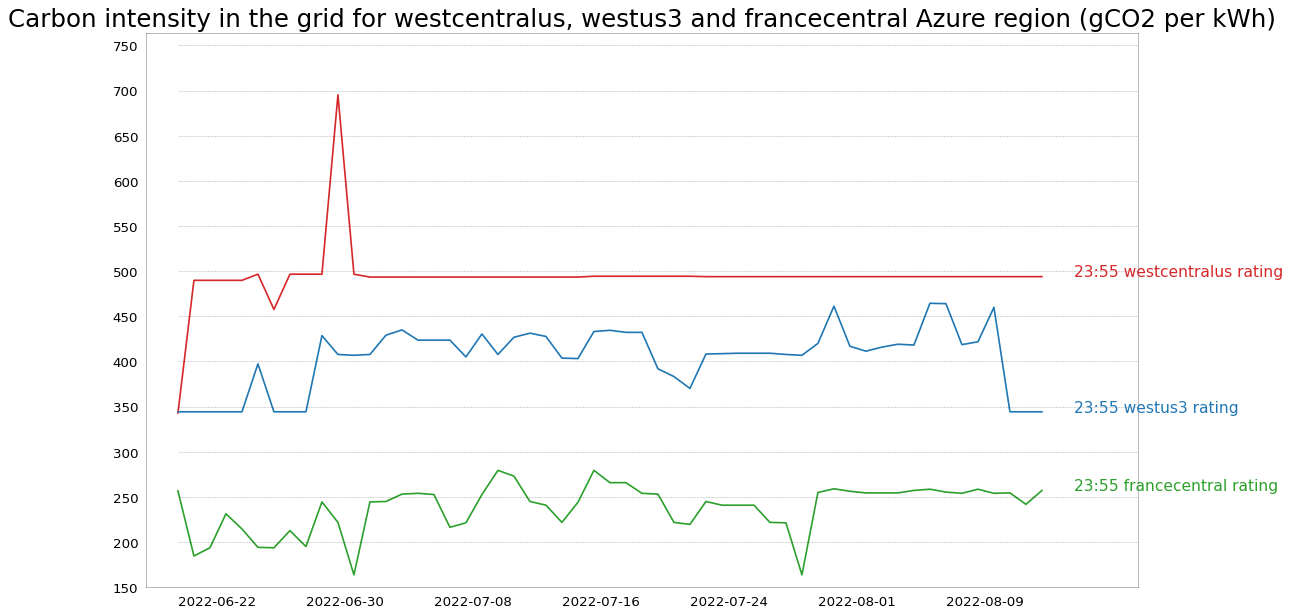

In [21]:
# Import Data
df = df4

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 150
y_UL = int(df.iloc[:, 1:].max().max()*1.1)
y_interval = 50
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = df.columns[1:]  
for i, column in enumerate(columns):    
    plt.plot(df.date.values, df[column].values, lw=1.5, color=mycolors[i])    
    plt.text(df.shape[0]+1, df[column].values[-1], column, fontsize=14, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=60, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Carbon intensity in the grid for westcentralus, westus3 and francecentral Azure region (gCO2 per kWh)', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, df.shape[0], 8), df.date.values[::8], horizontalalignment='left', fontsize=12)    
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 60)    
plt.show()



Getting the average percentage decrease in carbon intensity:

In [22]:
original_location_mean = df["23:55 westcentralus rating"].mean()
first_move_location_mean = df["23:55 westus3 rating"].mean()
new_location_mean = df["23:55 francecentral rating"].mean()
perc_decrease = (first_move_location_mean-new_location_mean)/first_move_location_mean*100
print ("Carbon intensity percentage decrease as a result of location shifting from westus3: {perc_decrease:.2f}%".format(perc_decrease = perc_decrease))
perc_decrease = (original_location_mean-new_location_mean)/original_location_mean*100

print ("Carbon intensity percentage decrease as a result of location shifting from westcentralus: {perc_decrease:.2f}%".format(perc_decrease = perc_decrease))

Carbon intensity percentage decrease as a result of location shifting from westus3: 41.04%
Carbon intensity percentage decrease as a result of location shifting from westcentralus: 51.76%


## Actual carbon emissions would have decreased by 51.76% in the last 55 days as a result of this location shift, compared to `westcentralus`!